In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from sklearn.linear_model import LinearRegression


from scipy.signal import savgol_filter
from scipy.stats import linregress
from scipy.signal import savgol_filter

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [2]:
df = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_NaCl_conc.csv', sep=',', index_col=0)
df['wl'] = df.index.astype(float)

df_nacl_2 = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_NaCl_conc_2.csv', sep=',', index_col=0)
df_nacl_2['wl'] = df_nacl_2.index.astype(float)

df_nacl_3 = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_NaCl_conc_3.csv', sep=',', index_col=0)
df_nacl_3['wl'] = df_nacl_3.index.astype(float)

df_oxy = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_DO_experiments_1.csv', sep=',', index_col=0)
df_oxy['wl'] = df_oxy.index.astype(float)
df_oxy = df_oxy.drop('0204172400B', axis=1)

df_salt = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_salt_mix.csv', sep=',', index_col=0)
df_salt['wl'] = df_salt.index.astype(float)
df_salt = df_salt.drop('Salt_mix_ppt_30_a', axis=1)


df_meta = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_Meta.csv', sep=',', index_col=0)

df_meta

Temp  Cond_uS  Cond_mS    DO    pH  NaCl_ppt  blank_Temp  \
Sample_ID                                                                       
0204172400B        22.822   247.20      NaN   1.4  5.71     0.000      23.102   
0204172400C        22.822   247.20      NaN   1.4  5.71     0.000      23.102   
0204172400D        22.822   247.20      NaN   1.4  5.71     0.000      23.102   
0204172401B        22.761    63.61      NaN  11.6  7.56     0.000      23.102   
0204172401C        22.761    63.61      NaN  11.6  7.56     0.000      23.102   
...                   ...      ...      ...   ...   ...       ...         ...   
per_66_NaCl_c      21.300      NaN    84.50   6.3  4.90    59.617      21.300   
NaCl_86435g_a      21.300      NaN   116.70   6.1  5.15    89.435      21.300   
NaCl_86435g_b      21.300      NaN   116.70   6.1  5.15    89.435      21.300   
NaCl_86435g_c      21.300      NaN   116.70   6.1  5.15    89.435      21.300   
DI_00ppth_blank_d  21.300    46.26    41.96   6.1  5.41     0.000      21.300   

                   blank_Cond_mS  blank_DO  blank_pH  salt_ppt  NaCl_gL  \
Sample_ID                                                                 
0204172400B                  NaN       NaN       NaN     0.000    0.000   
0204172400C                  NaN       NaN       NaN     0.000    0.000   
0204172400D                  NaN       NaN       NaN     0.000    0.000   
0204172401B                  NaN       NaN       NaN     0.000    0.000   
0204172401C                  NaN       NaN       NaN     0.000    0.000   
...                          ...       ...       ...       ...      ...   
per_66_NaCl_c            0.04626       6.1      5.41    59.617   59.617   
NaCl_86435g_a            0.04626       6.1      5.41    89.435   89.435   
NaCl_86435g_b            0.04626       6.1      5.41    89.435   89.435   
NaCl_86435g_c            0.04626       6.1      5.41    89.435   89.435   
DI_00ppth_blank_d        0.04626       6.1      5.41     0.000    0.000   

                   Na2SO4_gL  KCl_gL  NaHCO3_gL  KBr_gL  NaF_gL  \
Sample_ID                                                         
0204172400B              0.0     0.0        0.0     0.0     0.0   
0204172400C              0.0     0.0        0.0     0.0     0.0   
0204172400D              0.0     0.0        0.0     0.0     0.0   
0204172401B              0.0     0.0        0.0     0.0     0.0   
0204172401C              0.0     0.0        0.0     0.0     0.0   
...                      ...     ...        ...     ...     ...   
per_66_NaCl_c            0.0     0.0        0.0     0.0     0.0   
NaCl_86435g_a            0.0     0.0        0.0     0.0     0.0   
NaCl_86435g_b            0.0     0.0        0.0     0.0     0.0   
NaCl_86435g_c            0.0     0.0        0.0     0.0     0.0   
DI_00ppth_blank_d        0.0     0.0        0.0     0.0     0.0   

                   MgCl2x6H2O_gL  CaCl2x2H2O_gL  SrCl2x6H2O_gL  
Sample_ID                                                       
0204172400B                  0.0            0.0            0.0  
0204172400C                  0.0            0.0            0.0  
0204172400D                  0.0            0.0            0.0  
0204172401B                  0.0            0.0            0.0  
0204172401C                  0.0            0.0            0.0  
...                          ...            ...            ...  
per_66_NaCl_c                0.0            0.0            0.0  
NaCl_86435g_a                0.0            0.0            0.0  
NaCl_86435g_b                0.0            0.0            0.0  
NaCl_86435g_c                0.0            0.0            0.0  
DI_00ppth_blank_d            0.0            0.0            0.0  

[61 rows x 20 columns]

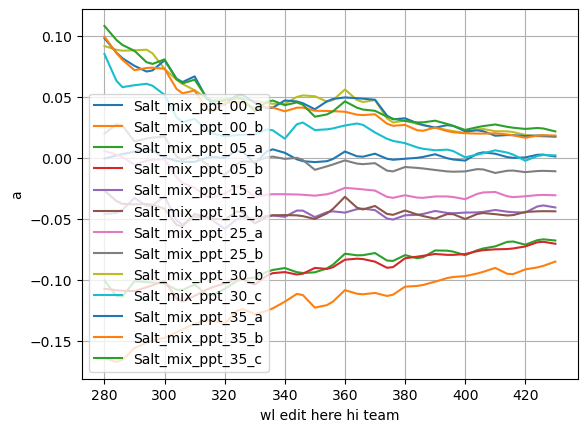

In [3]:
# Plotting each column against 'wl'
for column in df_salt.columns:
    if column != 'wl':  # Skip 'wl' column
        plt.plot(df_salt['wl'], df_salt[column], label=column)

plt.xlabel('wl edit here hi team')
plt.ylabel('a')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


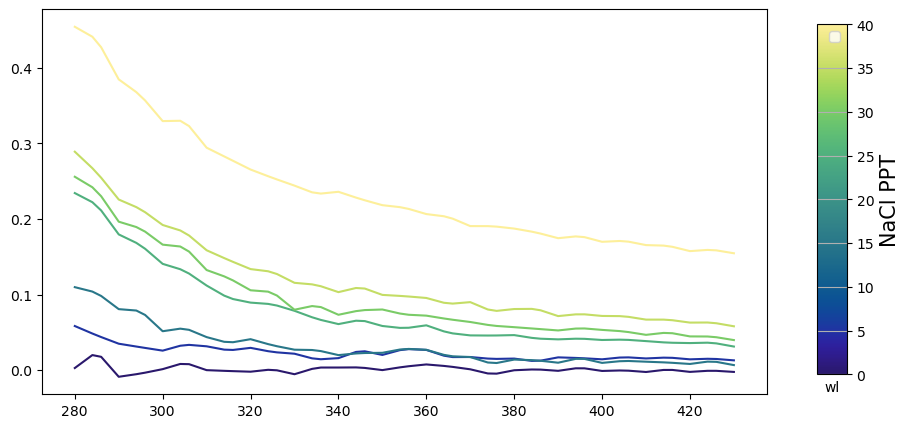

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'NaCl_ppt'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (40 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.haline(color_normalized)  # Map normalized color to colormap
        axes.plot(df['wl'], df[column], label=column, color=color_mapped)
        
# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.haline, norm=plt.Normalize(vmin=0, vmax=40)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth', size=15)

plt.xlabel('wl')
plt.ylabel('NaCl PPT')
plt.title('')
plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/NaCl_1.png")

plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


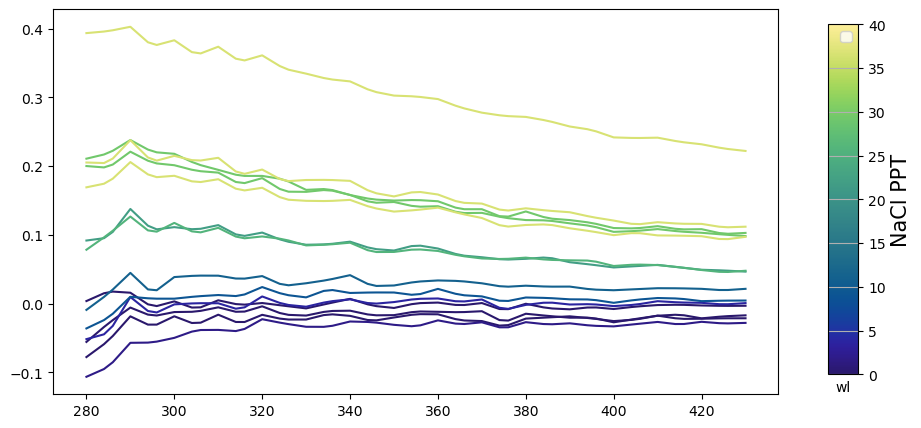

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df_nacl_2.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'NaCl_ppt'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (40 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.haline(color_normalized)  # Map normalized color to colormap
        axes.plot(df_nacl_2['wl'], df_nacl_2[column], label=column, color=color_mapped)
        
# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.haline, norm=plt.Normalize(vmin=0, vmax=40)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth', size=15)

plt.xlabel('wl')
plt.ylabel('NaCl PPT')
plt.title('')
plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/NaCl_2.png")

plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


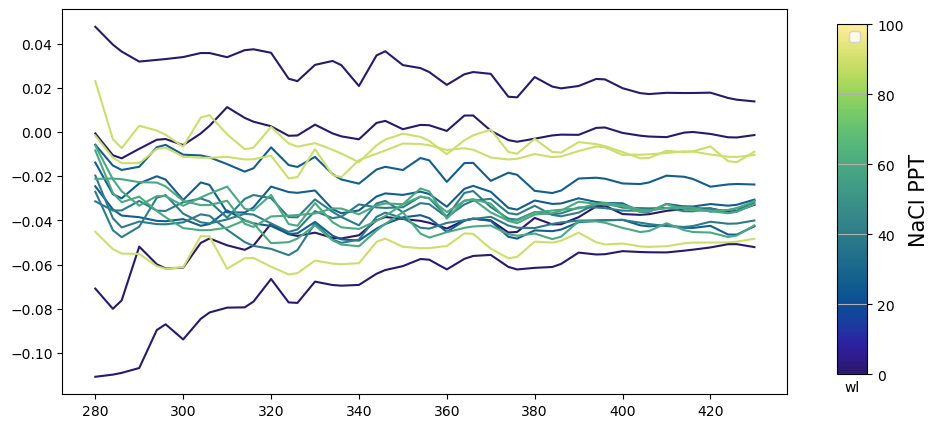

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df_nacl_3.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'NaCl_ppt'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (100 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.haline(color_normalized)  # Map normalized color to colormap
        axes.plot(df_nacl_3['wl'], df_nacl_3[column], label=column, color=color_mapped)
        
# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.haline, norm=plt.Normalize(vmin=0, vmax=100)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth', size=15)

plt.xlabel('wl')
plt.ylabel('NaCl PPT')
plt.title('')
plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/NaCl_3.png")

plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


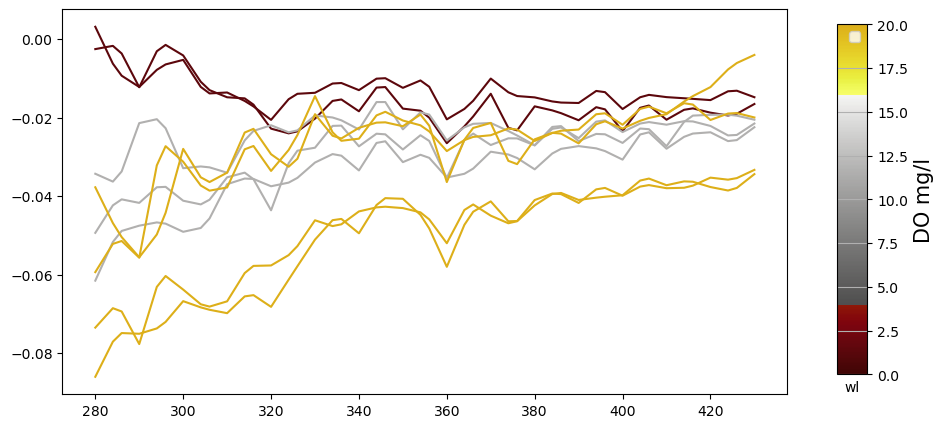

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df_oxy.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'DO'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (20 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.oxy(color_normalized)  # Map normalized color to colormap
        axes.plot(df_oxy['wl'], df_oxy[column], label=column, color=color_mapped)
        
# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.oxy, norm=plt.Normalize(vmin=0, vmax=20)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth', size=15)

plt.xlabel('wl')
plt.ylabel('DO mg/l')
plt.title('')
plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/Oxy_exps_1.png")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


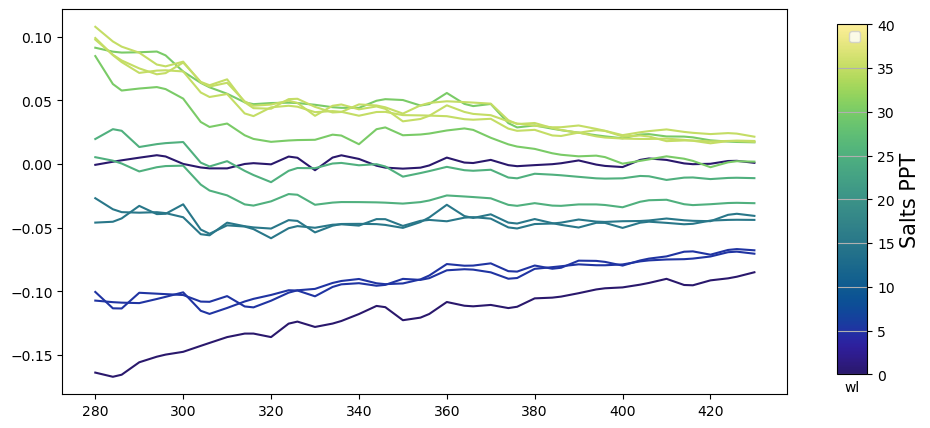

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df_salt.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'salt_ppt'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (40 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.haline(color_normalized)  # Map normalized color to colormap
        axes.plot(df_salt['wl'], df_salt[column], label=column, color=color_mapped)
        
# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.haline, norm=plt.Normalize(vmin=0, vmax=40)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth', size=15)

plt.xlabel('wl')
plt.ylabel('Salts PPT')
plt.title('')
plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/salt_mix_exps_1.png")

plt.show()

In [8]:
df_nacl_trans = df.T
df_nacl_trans = df_nacl_trans.add_prefix('a')
df_nacl_trans = df_nacl_trans.drop(index='wl')

df_ox_trans = df_oxy.T
df_ox_trans = df_ox_trans.add_prefix('a')
df_ox_trans = df_ox_trans.drop(index='wl')

df_salt_trans = df_salt.T
df_salt_trans = df_salt_trans.add_prefix('a')
df_salt_trans = df_salt_trans.drop(index='wl')

df_nacl_trans_2 = df_nacl_2.T
df_nacl_trans_2 = df_nacl_trans_2.add_prefix('a')
df_nacl_trans_2 = df_nacl_trans_2.drop(index='wl')

result_1 = pd.concat([df_salt_trans, df_nacl_trans])
result_1 = pd.concat([result_1, df_nacl_trans_2])
result = pd.concat([result_1, df_ox_trans])


result_1 = df_meta.join(result_1)
result = df_meta.join(result)

def fill_cond_ms(row):
    if pd.isnull(row['Cond_mS']):
        return row['Cond_uS'] / 1000
    else:
        return row['Cond_mS']

# Apply the function to fill NaN values in Cond_mS
result['Cond_mS'] = result.apply(fill_cond_ms, axis=1)
result_1['Cond_mS'] = result_1.apply(fill_cond_ms, axis=1)

result


Temp  Cond_uS    Cond_mS    DO    pH  NaCl_ppt  \
Sample_ID                                                             
0204172400B        22.822  247.200   0.247200   1.4  5.71    0.0000   
0204172400C        22.822  247.200   0.247200   1.4  5.71    0.0000   
0204172400D        22.822  247.200   0.247200   1.4  5.71    0.0000   
0204172401B        22.761   63.610   0.063610  11.6  7.56    0.0000   
0204172401C        22.761   63.610   0.063610  11.6  7.56    0.0000   
0204172401D        22.761   63.610   0.063610  11.6  7.56    0.0000   
0204172402A        22.845    3.766   0.003766  20.0  5.88    0.0000   
0204172402B        22.845    3.766   0.003766  20.0  5.88    0.0000   
0204172402C        22.845    3.766   0.003766  20.0  5.88    0.0000   
0204172402D        22.845    3.766   0.003766  20.0  5.88    0.0000   
NaCl_ppt_00        23.700  144.100   0.144100   4.1  8.74    0.0000   
NaCl_ppt_05        22.800      NaN   8.885000   4.9  7.31    5.0000   
NaCl_ppt_15        22.600      NaN  26.700000   4.8  6.94   15.0000   
NaCl_ppt_25        22.800      NaN  45.760000   4.8  6.85   25.0000   
NaCl_ppt_30        23.000      NaN  48.750000   4.8  6.82   30.0000   
NaCl_ppt_35        22.900      NaN  57.680000   4.8  6.63   35.0000   
NaCl_ppt_40        22.800      NaN  64.430000   4.9  6.74   40.0000   
Salt_mix_ppt_00_a  22.600  433.500   0.433500   6.6  4.92    0.0000   
Salt_mix_ppt_00_b  22.600  355.500   0.355500   6.3  5.26    0.0000   
Salt_mix_ppt_05_a  22.600      NaN   6.083000   5.3  6.78    3.1785   
Salt_mix_ppt_05_b  22.500      NaN   7.465000   6.6  6.79    3.1785   
Salt_mix_ppt_15_a  22.500      NaN  17.770000   4.6  7.81    8.4760   
Salt_mix_ppt_15_b  22.300      NaN  16.120000   7.9  7.09    8.4760   
Salt_mix_ppt_25_a  22.400      NaN  31.480000   5.6  7.63   14.8330   
Salt_mix_ppt_25_b  22.400      NaN  32.700000   4.8  7.62   14.8330   
Salt_mix_ppt_30_a  22.500      NaN  38.670000   6.1  7.95   18.0115   
Salt_mix_ppt_30_b  22.500      NaN  34.350000   8.0  7.75   18.0115   
Salt_mix_ppt_30_c  22.300      NaN  34.400000   5.6  7.93   18.0115   
Salt_mix_ppt_35_a  22.300      NaN  44.450000   5.3  7.58   21.1900   
Salt_mix_ppt_35_b  22.300      NaN  44.630000   6.1  7.48   21.1900   
Salt_mix_ppt_35_c  22.300      NaN  43.710000   6.3  6.80   21.1900   
0ppt_a             22.200   12.920   0.012920   5.6  8.24    0.0000   
0ppt_b             22.500    2.239   0.002239   6.1  8.46    0.0000   
0ppt_c             22.500    4.046   0.004046   6.3  6.83    0.0000   
NaCl_per_05        22.600      NaN   2.799000   5.3  5.65    1.8357   
NaCl_per_10        22.500      NaN   6.133000   5.3  5.31    3.6714   
NaCl_per_25        22.500      NaN  13.180000   5.1  5.16    9.1785   
NaCl_per_30        22.600      NaN  16.960000   5.6  5.21   11.0142   
NaCl_per_60        22.500      NaN  34.180000   5.8  5.14   22.0284   
NaCl_per_70        22.500      NaN  38.400000   5.6  5.22   25.6998   
NaCl_per_80a       22.500      NaN  43.630000   5.6  5.04   29.3712   
NaCl_per_80b       22.500      NaN  43.760000   6.1  5.24   29.3712   
36ppt_a            22.600      NaN  49.010000   5.6  5.11   36.7140   
36ppt_b            22.500      NaN  53.440000   6.1  5.14   36.7140   
36ppt_c            22.500      NaN  51.500000   6.6  5.12   36.7140   

                   blank_Temp  blank_Cond_mS  blank_DO  blank_pH  ...  \
Sample_ID                                                         ...   
0204172400B            23.102            NaN       NaN       NaN  ...   
0204172400C            23.102            NaN       NaN       NaN  ...   
0204172400D            23.102            NaN       NaN       NaN  ...   
0204172401B            23.102            NaN       NaN       NaN  ...   
0204172401C            23.102            NaN       NaN       NaN  ...   
0204172401D            23.102            NaN       NaN       NaN  ...   
0204172402A            23.102            NaN       NaN       NaN  ...   
0204172402B            23.

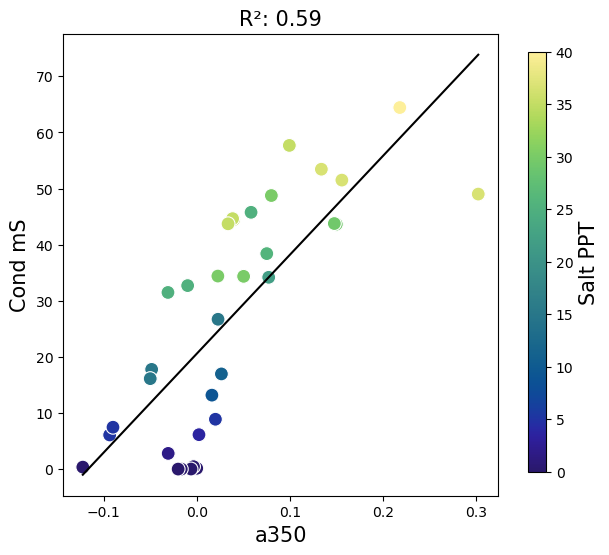

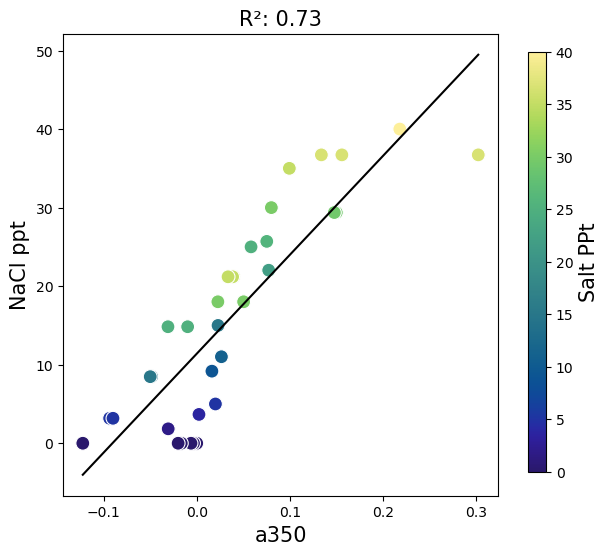

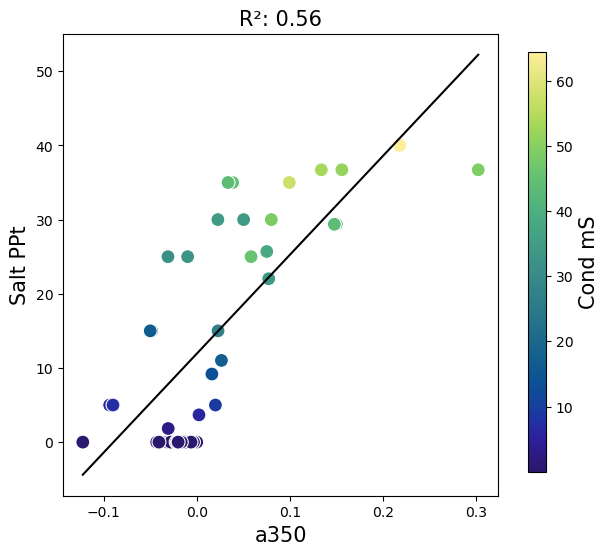

In [9]:
def xyplotcolor(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = df[z_var].min()
    vmax = df[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    plt.savefig(f'..//Dissertation_projects/Absorption_experiments/Figs/{save_name}.png')
    plt.show() 



x_var = 'a350'
y_var = 'Cond_mS'

x_var_lab = 'a350'
y_var_lab = 'Cond mS'

z_var = 'salt_ppt'
z_var_lab = 'Salt PPT'
z_var_color = cmo.haline

titel = ""
save_name = 'conc_a350_scatter'
xyplotcolor(result_1)

x_var = 'a350'
y_var = 'NaCl_ppt'

x_var_lab = 'a350'
y_var_lab = 'NaCl ppt'

z_var = 'salt_ppt'
z_var_lab = 'Salt PPt'
z_var_color = cmo.haline

titel = ""
save_name = 'NaCl_a350_scatter'
xyplotcolor(result_1)



x_var = 'a350'
y_var = 'salt_ppt'

x_var_lab = 'a350'
y_var_lab = 'Salt PPt'

z_var = 'Cond_mS'
z_var_lab = 'Cond mS'
z_var_color = cmo.haline

titel = ""
save_name = 'salt_a350_scatter'
xyplotcolor(result)


#NaCL is a better predictor of a350 then cond or total salts 

In [10]:
df_meta.columns

Index(['Temp', 'Cond_uS', 'Cond_mS', 'DO', 'pH', 'NaCl_ppt', 'blank_Temp',
       'blank_Cond_mS', 'blank_DO', 'blank_pH', 'salt_ppt', 'NaCl_gL',
       'Na2SO4_gL', 'KCl_gL', 'NaHCO3_gL', 'KBr_gL', 'NaF_gL', 'MgCl2x6H2O_gL',
       'CaCl2x2H2O_gL', 'SrCl2x6H2O_gL'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                   a350   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     46.03
Date:                Fri, 24 May 2024   Prob (F-statistic):           5.24e-10
Time:                        20:44:53   Log-Likelihood:                 58.035
No. Observations:                  34   AIC:                            -110.1
Df Residuals:                      31   BIC:                            -105.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

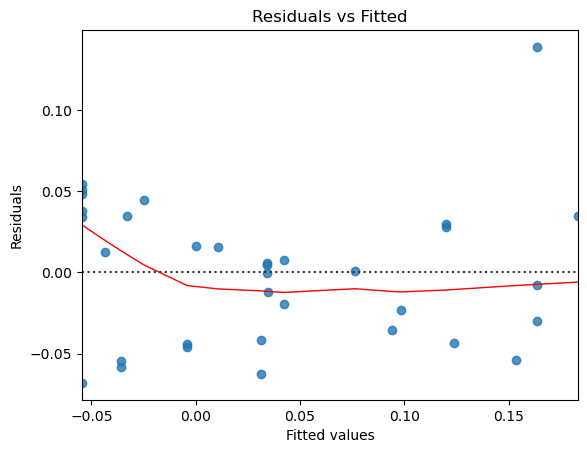

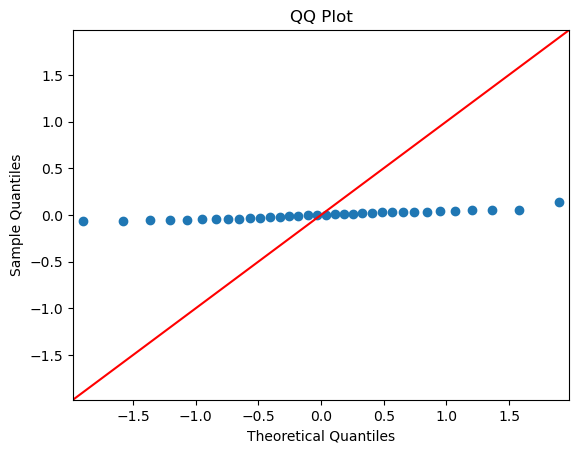

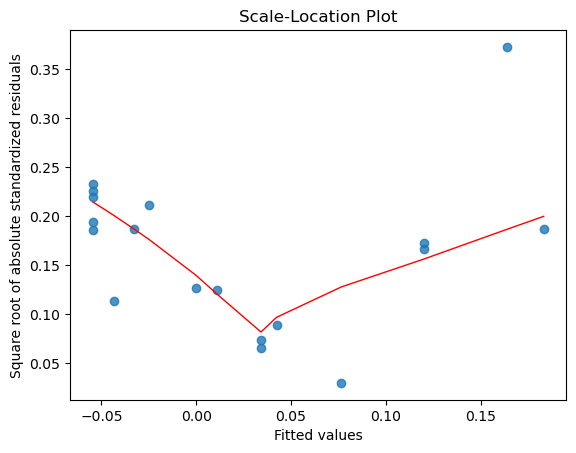

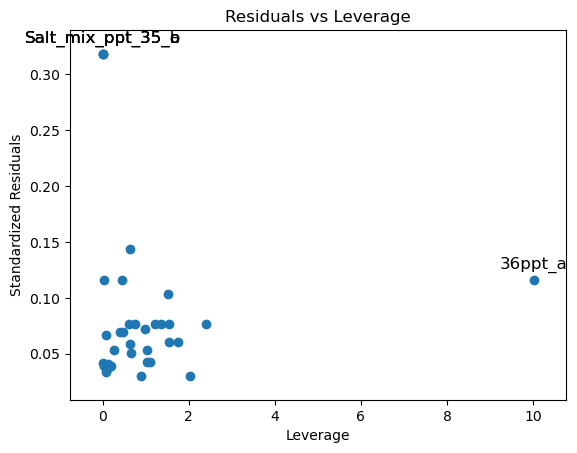

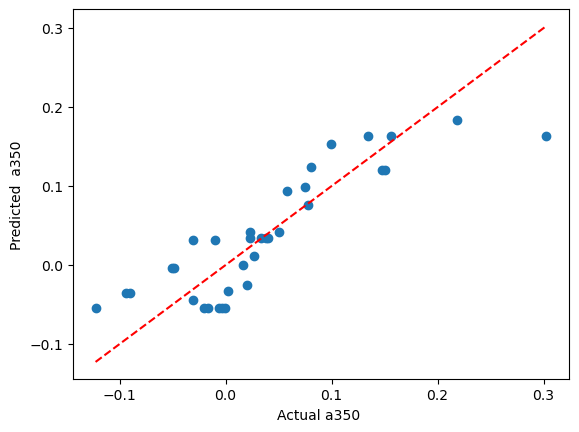

a350 = -0.0545 * Intercept + 0.0059 * NaCl_gL + -1483.3025 * Na2SO4_gL:KCl_gL:NaHCO3_gL:KBr_gL:NaF_gL:MgCl2x6H2O_gL:CaCl2x2H2O_gL:SrCl2x6H2O_gL 


In [11]:
# Define the formula for linear regression

formula = 'a350 ~ NaCl_gL + Na2SO4_gL : KCl_gL : NaHCO3_gL : KBr_gL : NaF_gL : MgCl2x6H2O_gL : CaCl2x2H2O_gL : SrCl2x6H2O_gL'
df_OM = result_1

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['a350_pred'] = predicted

# Plot
plt.scatter(df_OM['a350'], predicted)
plt.xlabel(r'Actual a350 ')
plt.ylabel('Predicted  a350')
plt.title('')
plt.plot([df_OM['a350'].min(), df_OM['a350'].max()], 
         [df_OM['a350'].min(), df_OM['a350'].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()



# Print out the equation nicely
print("a350 =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()